# 8.0 Compare accuracy of 6 different algorithms for the same dataset

[How To Compare Machine Learning Algorithms in Python with scikit-learn](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/)


Comparing Machine Learning Classification Algorithms Accuracy in Python | sklearn - 
https://www.youtube.com/watch?v=X1CrNnPLZJ8&ab_channel=WebDevWithArtisan

In [8]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

### Project At A Glance
The problem is a standard binary classification dataset called the Pima Indians onset of diabetes problem. The problem has two classes and eight numeric input variables of varying scales.

## 6 different algorithms are compared:

- Logistic Regression
- Linear Discriminant Analysis
- K-Nearest Neighbors
- Classification and Regression Trees
- Naive Bayes
- Support Vector Machines

## Project methodology

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

Each algorithm is given a short name, useful for summarizing results afterward.

Анализ моделей не должен включать тестовую выборку. Тестовая выборка используется в самом конце - в финальном тестировании лучшей модели.

Если валидациционной выборки нет, то анализ моделей должен выглядеть так:

- 1) RMSE вычисляется с помощью кросс-валидации на тренировочной выборке
- 2) Время обучения = время model.fit(X_train, y_train)
- 3) Время предсказания = model.predict(X_train)

<div class="alert alert-block alert-info">
<b>Общая методология выбора и тестирования наилучшей модели</b>

Чтобы все было ясно, напишу конкретный план (структуру) обучения и анализа моделей:

1. **Обучение моделей**. В обучении нужно рассмотреть хотя бы одну простую модель и один бустинг. Подбор гиперпараметров нужно провести хотя бы одной модели. Тут есть два варианта:
    - без валидационной выборки. Здесь нужно подбирать гиперпараметры с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV или вручную (cross_val_score));
    - валидационная выборка есть. Здесь можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.  
    
    
    
2. **Анализ моделей.** После нахождения лучших гиперпараметров стоит измерить время обучения, предсказания и RMSE. Тут тоже есть два варианта:
    - ***без валидационной выборки***: RMSE на кросс-валидации. Время обучения = время model.fit(X_train). Время предсказания  = model.predict(X_train);
    
    - ***валидационная выборка есть***: RMSE на validation. Время обучения = время model.fit(X_train). Время предсказания = время model.predict(X_valid).  
    
    После этого делаем вывод по анализу и советуем заказчику одну модель на основе его критериев.
    
    
    
3. **Тестирование.** Рассчитаем финальную метрику лучшей модели на тестовой выборке (до этого тестовая выборка нигде не должна использоваться!). RMSE должно быть меньше 2500. Если метрика не дотягивает, можно исправить мои замечания, также можно потюнить гиперпараметры (на этапе обучения моделей, не на тестовой выборке!)
</div>

## Data Description

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

    Attribute number:    Mean:   Standard Deviation:
    1.                     3.8     3.4
    2.                   120.9    32.0
    3.                    69.1    19.4
    4.                    20.5    16.0
    5.                    79.8   115.2
    6.                    32.0     7.9
    7.                     0.5     0.3
    8.                    33.2    11.8


In [9]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
# loading dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

In [11]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [12]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

/Users/yuliabezginova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yuliabezginova/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

LR: 0.778640 (0.047350)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.695437 (0.041174)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


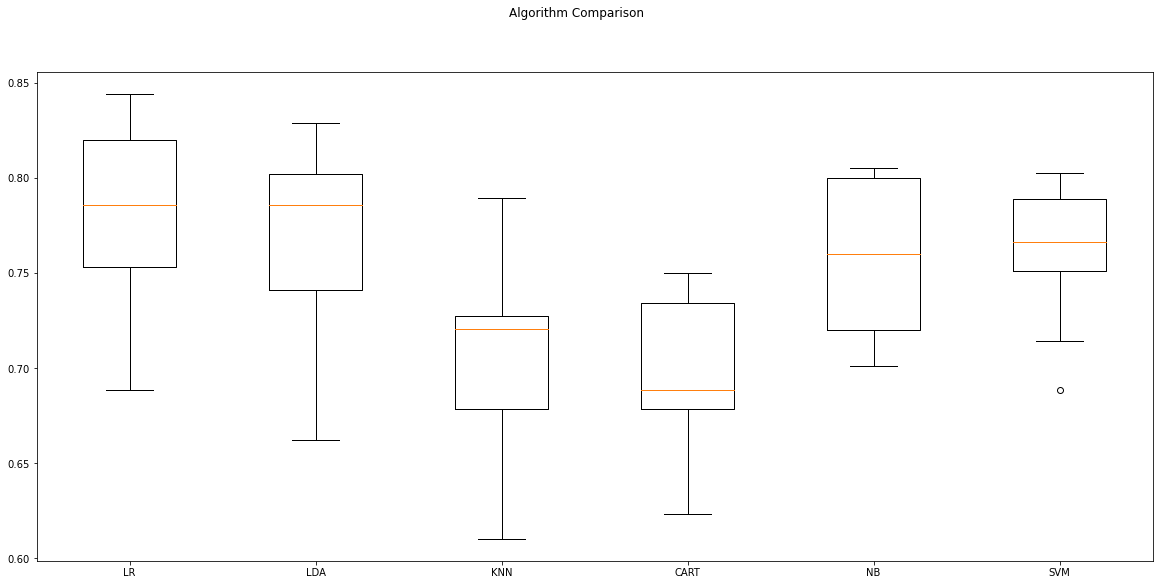

In [16]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion

- LR: 0.778640 (0.047350)
- LDA: 0.766969 (0.047966)
- KNN: 0.710988 (0.050792)
- CART: 0.688893 (0.041042)
- NB: 0.759142 (0.038960)
- SVM: 0.760458 (0.034712)

**From these results, it would suggest that both logistic regression and linear discriminate analysis are perhaps worthy of further study on this problem.**

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***